# Marco Antonio Manzo Ruiz
# 173127
#Artificial Intelligence
#08/05/2023
#Traveling Salesman Problem resolved using a Genetic Algorithm

# Import the necessary libraries.

In [386]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create the graph by adding edges between nodes.

In [387]:
# Creating the graph
graph = nx.Graph()

# Adding the cities as nodes
graph.add_nodes_from(['Amsterdam', 'Berlin', 'Cologne', 'London', 'Brussels', 'Frankfurt', 'Paris', 'Lyon', 'Milan', 'Rome', 'Barcelona', 'Madrid'])

# Adding the weighted edges with two attributes each (Time and Cost)

# From Amsterdan
graph.add_edge("Amsterdam", "Berlin", time=364, cost=235)
graph.add_edge("Amsterdam", "Cologne", time=120, cost=40)
graph.add_edge("Amsterdam", "Brussels", time=105, cost=48)

# From Berlin
graph.add_edge("Berlin", "Amsterdam", time=364, cost=235)
graph.add_edge("Berlin", "Frankfurt", time=232, cost=125)

# From Cologne
graph.add_edge("Cologne", "Amsterdam", time=120, cost=40)
graph.add_edge("Cologne", "Frankfurt", time=120, cost=40)

# From Frankfurt
graph.add_edge("Frankfurt", "Berlin", time=232, cost=125)
graph.add_edge("Frankfurt", "Cologne", time=120, cost=40)
graph.add_edge("Frankfurt", "Paris", time=480, cost=345)
graph.add_edge("Frankfurt", "Milan", time=454, cost=240)

# From Brussels
graph.add_edge("Brussels", "Amsterdam", time=105, cost=48)
graph.add_edge("Brussels", "Paris", time=82, cost=80)

# From London
graph.add_edge("London", "Paris", time=136, cost=98)
graph.add_edge("London", "Brussels", time=136, cost=98)

# From Paris
graph.add_edge("Paris", "London", time=136, cost=98)
graph.add_edge("Paris", "Brussels", time=82, cost=80)
graph.add_edge("Paris", "Frankfurt", time=480, cost=345)
graph.add_edge("Paris", "Lyon", time=112, cost=185)
graph.add_edge("Paris", "Barcelona", time=390, cost=400)
graph.add_edge("Paris", "Madrid", time=225, cost=380)

# From Lyon
graph.add_edge("Lyon", "Paris", time=112, cost=185)
graph.add_edge("Lyon", "Milan", time=176, cost=180)
graph.add_edge("Lyon", "Barcelona", time=200, cost=320)

# From Milan
graph.add_edge("Milan", "Frankfurt", time=454, cost=240)
graph.add_edge("Milan", "Rome", time=168, cost=125)
graph.add_edge("Milan", "Lyon", time=176, cost=180)

# From Barcelona
graph.add_edge("Barcelona", "Paris", time=390, cost=400)
graph.add_edge("Barcelona", "Lyon", time=200, cost=320)
graph.add_edge("Barcelona", "Madrid", time=150, cost=98)

# From Madrid
graph.add_edge("Madrid", "Paris", time=225, cost=380)
graph.add_edge("Madrid", "Barcelona", time=150, cost=98)

# Set up the positions of the nodes in the graph.

In [388]:
# We create a positions dictionary to place every node in a determined position
position = {
        "London": (0, 6),
        "Madrid": (0, 0),
        "Paris": (0.5, 4),
        "Barcelona": (1, 1),
        "Brussels": (1.5, 5),
        "Amsterdam": (2.5, 7),
        "Lyon": (2.5, 2.5),
        "Cologne": (3, 5.5),
        "Frankfurt": (4, 5),
        "Milan": (4, 2.5),
        "Berlin": (5, 7),
        "Rome": (5, 1),
      }

# Draw the previously created Graph.

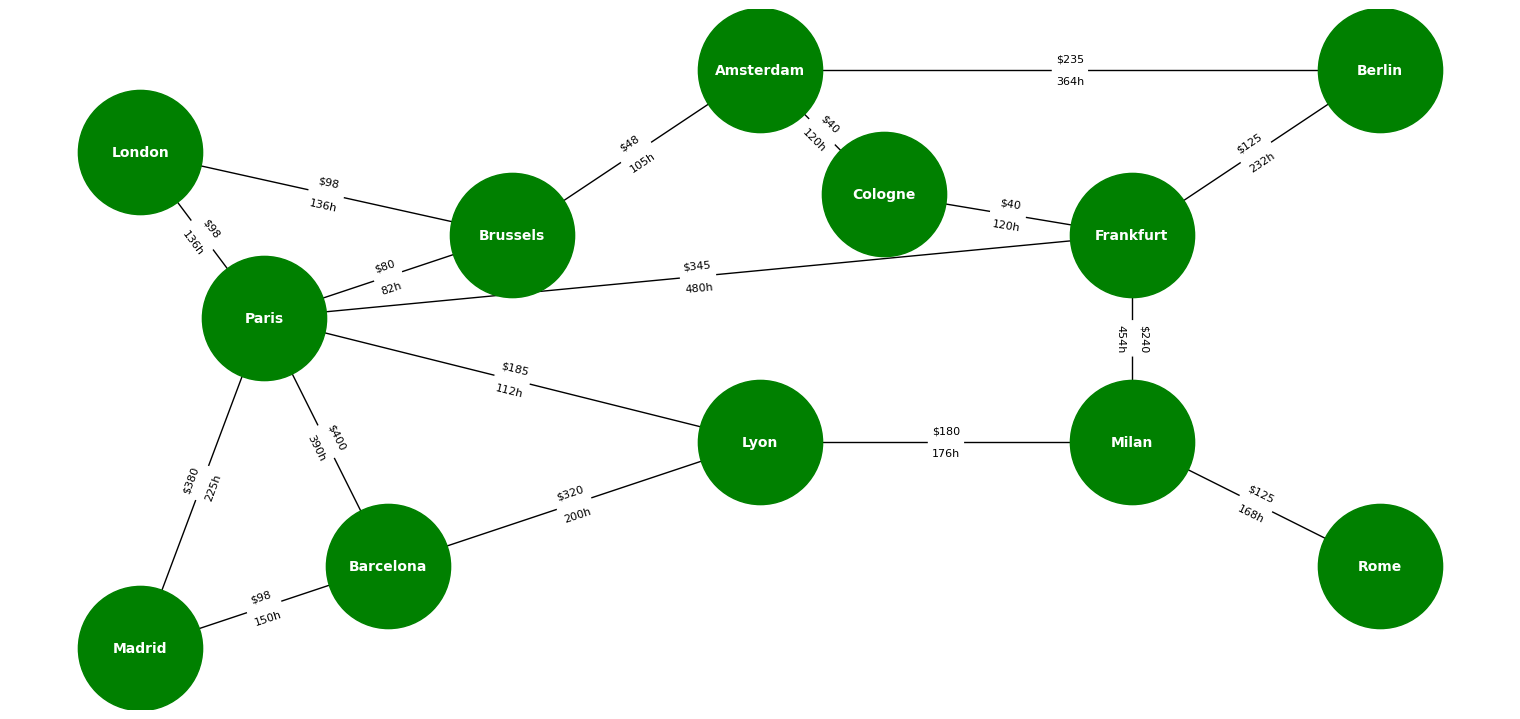

In [389]:
# Creating the edge labels
edge_labels = {}
for u, v, data in graph.edges(data=True):
    edge_labels[u, v] = f"${data['cost']}\n\n{data['time']}h"

# Set the figure size
plt.figure(figsize=(15, 7))

# Drawing the graph
nx.draw(graph, position, with_labels=True, node_color='green', font_weight='bold', font_size=10, font_color='white', node_size=8000)

# Adding the weigths to every edge
nx.draw_networkx_edge_labels(graph, position, edge_labels=edge_labels, font_size=8, font_weight='light')

# Print the graph
plt.show()

# Create the fitness function.

In [390]:
def fitnessFunction(circuit):
    # Checks if the given circuit is valid by iterating through each node and 
    # checking if there is an edge connecting it to the next node in the circuit
    for i in range(len(circuit)-1):
      try:
        edge = graph[circuit[i]][circuit[i+1]]
      except:
        return -1

    # Calculate the cost of the Circuits (shorter circuits will have higher 
    # fitness scores than longer circuits)
    cost = 1/sum(graph[circuit[i]][circuit[i+1]]['cost'] for i in range(len(circuit)-1))
    
    # Calculate the number of unique nodes in the circuit (The nodes that were 
    # only visited once)
    uniqueNodes = len(set(circuit))

    # Sum of the cost and the number of unique nodes as the fitness score for 
    # the given circuit
    return cost + uniqueNodes

# Function to generate the circuit which the population will have to go through.

In [391]:
def generateCircuit():
    # Start at a random node
    currentNode = random.choice(list(graph.nodes()))

    # Initialize the variables of the circuit, cost and time
    circuit = [currentNode]
    cost = 0
    time = 0

    # Go through the graph until the time limit is done or no more close nodes 
    # are available
    unique = 0
    while time < 4320:
      # Get the neighbors of the current node
      neighborsNodes = list(graph[currentNode])

      # Choose a random neighbor
      nextNode = random.choice(neighborsNodes)

      # Update the circuit, cost and time
      circuit.append(nextNode)
      edge = graph[currentNode][nextNode]
      cost += edge['cost']
      time += edge['time']
      
      # Move to the next node
      currentNode = nextNode
    return circuit, time, cost

# Create a "Gen" that sorts the two best circuits according to the fitness score value.

In [392]:
# Find the two best circuits with the highest fitness scores 
def sortingGen(circuits):
    # Sort the circuits
    sortedBestCircuits = sorted(circuits, key=lambda x: x['fitnessScore'], reverse = True)

    # Return the sorted list of the circuits with the highest fitness scores
    return sortedBestCircuits

# Create an individual circuit fot the travelling salesman.

In [393]:
def createIndividualCircuit():
    circuit, cost, time = generateCircuit()
    fitnessScore = fitnessFunction(circuit)
    circuitDictionary = {'circuit': circuit, 'cost': cost, 'time': time, 'fitnessScore': fitnessScore}
    return circuitDictionary

# Create the first generation of individuals in the population.

In [394]:
def firstGeneration(genSize):
  population = []
  for i in range(genSize):
      circuit = createIndividualCircuit()
      population.append(circuit)
  return population

# Function that calculates the cost and time taken for the circuits.

In [395]:
def calculateCostTime(circuit):
    # Initialize the cost and time counters
    incurredCost = 0
    elapsedTime = 0
    
    # Iterate over each node in the circuit, calculating the cost and time
    # required to travel to the next node.
    for i in range(len(circuit)-1):
        # Try to retrieve the edge between the current node and the next
        # node in the circuit.
        try:
            edge = graph[circuit[i]][circuit[i+1]]
        # If the edge does not exist, return a cost and time of 0 to indicate
        # an invalid circuit.
        except:
            return 0, 0

        # Increment the total incurred cost and elapsed time by the cost and
        # time of the current edge, respectively.
        incurredCost += edge['cost']
        elapsedTime += edge['time']
      
    # Return the total incurred cost and elapsed time as a tuple.
    return incurredCost, elapsedTime

# Create a crossover function, in this case, a two-point crossover function.

In [396]:
# Each parameter of this function should be a dictionary with the circuit of the individual
def crossoverFunction(circuit1, circuit2):
    # Get the circuits from the individuals and choose two random crossover points
    crossover_points = sorted(random.sample(range(1, len(circuit1)), 2))
    
    # Create the new circuits by swapping the segments between the crossover points
    newCircuit1 = circuit1['circuit'][:crossover_points[0]] + circuit2['circuit'][crossover_points[0]:crossover_points[1]] + circuit1['circuit'][crossover_points[1]:]
    newCircuit2 = circuit2['circuit'][:crossover_points[0]] + circuit1['circuit'][crossover_points[0]:crossover_points[1]] + circuit2['circuit'][crossover_points[1]:]
    
    # Create the new individuals with the new circuits
    crossoverIndividual1 = {'circuit': newCircuit1, 'time': 0, 'cost': 0, 'fitnessScore': 0}
    crossoverIndividual2 = {'circuit': newCircuit2, 'time': 0, 'cost': 0, 'fitnessScore': 0}
    
    # Calculate the cost and time for the new individuals
    crossoverIndividual1['time'], crossoverIndividual1['cost'] = calculateCostTime(newCircuit1)
    crossoverIndividual2['time'], crossoverIndividual2['cost'] = calculateCostTime(newCircuit2)
    
    # Calculate the fitness value for the new individuals
    crossoverIndividual1['fitnessScore'] = fitnessFunction(newCircuit1)
    crossoverIndividual2['fitnessScore'] = fitnessFunction(newCircuit2)
    
    return crossoverIndividual1, crossoverIndividual2

# Create the next generation by breeding the previous generation and returning the best of them by implementing elitism.

In [397]:
# Creating the next generation + best individuals from previous generation
def breedIndividuals(matingPool, eliteSize):
    # Create an empty list to hold the next generation of individuals
    nextGeneration = []
    
    # Calculate the number of new children to be created
    newChildren = len(matingPool) - eliteSize

    # Add the top eliteSize individuals from the current generation to the next
    # generation
    for i in range (0, eliteSize):
        nextGeneration.append(matingPool[i])

    # Breed new individuals until the desired number of children have been
    # created
    for i in range(0, newChildren, 2):
        # Use the two-point crossover function to create two new children
        # from two parent individuals
        child1, child2 = crossoverFunction(matingPool[i], matingPool[i+1])

        # Check if the new children have a valid fitness value
        if child1['fitnessScore'] != 0:
            nextGeneration.append(child1)
          
        if child2['fitnessScore'] != 0:
            nextGeneration.append(child2)
    
    # Return the next generation of individuals
    return nextGeneration

# Create the mutation function which chooses a random position in the circuit and swaps the city at that position with its neighbor.

In [398]:
def neighborSwapIndividualMutation(circuit, mutationRate):
    mutated = circuit
    if random.uniform(0, 1) < mutationRate:
        # Choose a random position in the circuit
        position = random.randint(0, len(circuit['circuit']) - 2)

        # Clear variables
        mutated['time'] = 0
        mutated['cost'] = 0
        mutated['fitnessScore'] = 0

        # Swap the city at the chosen position with its neighbor
        mutated['circuit'][position], mutated['circuit'][position+1] = mutated['circuit'][position+1], mutated['circuit'][position]
    
        # Calculate the time and cost for the new individuals
        mutated['time'], mutated['cost'] = calculateCostTime(mutated)
        
        # Calculate the fitness for the new individuals
        mutated['fitnessScore'] = fitnessFunction(mutated)
        
    return mutated

# Create a function that applies the mutation to the individuals and returns a list of them.

In [399]:
def mutatePopulation(generation, mutationRate):
  # Create an empty list for the mutated generation
  mutatedGeneration = []

  # Loop through each individual in the current generation
  for i in range(0, len(generation)):
    # Mutate the individual using the neighbor swap mutation function
    mutatedIndividual = neighborSwapIndividualMutation(generation[i], mutationRate)
    # Add the mutated individual to the mutated generation list
    mutatedGeneration.append(mutatedIndividual)
  
  # Return the mutated generation
  return mutatedGeneration

# Create a function to generate the next generation of individuals.

In [400]:
def nextGeneration(currentGeneration, eliteSize, mutationRate):
    # Sort the current generation by fitness, highest to lowest
    genRanked = sortingGen(currentGeneration)
    
    # Create new individuals through breeding from the top-performing
    # individuals (eliteSize)
    children = breedIndividuals(genRanked, eliteSize)
    
    # Mutate the new individuals to introduce variation into the population
    nextGeneration = mutatePopulation(children, mutationRate)
    
    # Return the new generation
    return nextGeneration

# Create a function that runs the genetic algorithm.

In [401]:
def RunTSP(pupulationSize, eliteSize, mutationRate, numberGenerations): 
    # Iterate over the specified number of generations
    for i in range(numberGenerations):
        # Generate the next generation
        population = nextGeneration(population, eliteSize, mutationRate)
        
        # Print the distance of the best route in the current generation
        print("\nFitness Score Value obtained by the best individual in the generation ", str(i+1), ": ", str(sortingGen(population)[0]['fitnessScore']))
    
    # Select the best individual from the final population
    bestCircuit = sortingGen(population)[0]
    
    # Return the best route
    return bestCircuit

# Run the Genetic Algorithm.

In [403]:
print('\nBest circuit: \n', RunTSP(pupulationSize = 200, eliteSize = 10, mutationRate = 0.1, numberGenerations = 100))

Initial distance: 12.000322164948454

Fitness Score Value obtained by the best individual in the generation  1 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  2 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  3 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  4 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  5 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  6 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  7 :  12.000322164948454

Fitness Score Value obtained by the best individual in the generation  8 :  12.000338753387535

Fitness Score Value obtained by the best individual in the generation  9 :  12.000338753387535

Fitness Score Value obtained by the best individual in the generation  10 :  12.000338753387535

F